In [1]:
import numpy as np
import pandas as pd
import random as rnd

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.naive_bayes import GaussianNB

In [2]:
train_df = pd.read_csv("./titanic/train.csv")   ## TITANIC DATASET KAGGLE
test_df = pd.read_csv("./titanic/test.csv")

In [3]:
#combine = pd.concat([train_df, test_df],axis = 0)
#combine.head()

In [4]:
combine = [train_df, test_df]

In [5]:
print(train_df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [6]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
train_df.info()
print('_'*40)
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB
________________________________________
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
PassengerId    418 non-null int64
Pclass         418 non-null int64
Name           418 non-null object
Sex            418 non-null object
Age            332 non-null float64
SibSp          418 non-null int64
Parch          418 non-null int64
Ticket         418 non-null

In [8]:
train_df.dtypes
print('_'*40)
test_df.dtypes

________________________________________


PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [9]:
categorical = train_df.dtypes[train_df.dtypes == 'object'].index
print(categorical)

Index(['Name', 'Sex', 'Ticket', 'Cabin', 'Embarked'], dtype='object')


In [10]:
train_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
# Review survived rate using `percentiles=[.61, .62]` knowing our problem description mentions 38% survival rate.
# Review Parch distribution using `percentiles=[.75, .8]`
# SibSp distribution `[.68, .69]`
# Age and Fare `[.1, .2, .3, .4, .5, .6, .7, .8, .9, .99]`

In [12]:
train_df.describe(include=['O']) #only categorical

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Watt, Mrs. James (Elizabeth ""Bessie"" Inglis Mi...",male,347082,G6,S
freq,1,577,7,4,644


In [13]:
#from above
#Names are unique across the dataset (count=unique=891)
#Sex variable as two possible values with 65% male (top=male, freq=577/count=891).
#Cabin values have several dupicates across samples. Alternatively several passengers shared a cabin.
#Embarked takes three possible values. S port used by most passengers (top=S)
#Ticket feature has high ratio (22%) of duplicate values (unique=681).

In [14]:
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [15]:
train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean().sort_values(by = 'Survived',ascending = False)

## numerical, ordinal

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
#train_df[['Pclass', 'Survived']].groupby(['Pclass'], as_index = False).mean()

In [17]:
train_df[['Sex','Survived']].groupby(['Sex'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [18]:
train_df[['SibSp','Survived']].groupby(['SibSp'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [19]:
train_df[['Parch','Survived']].groupby(['Parch'], as_index = False).mean().sort_values(by = 'Survived', ascending = False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


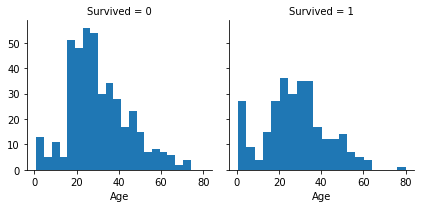

In [20]:
g = sns.FacetGrid(train_df, col = 'Survived')     ## ORdinal
g.map(plt.hist, 'Age', bins = 20)

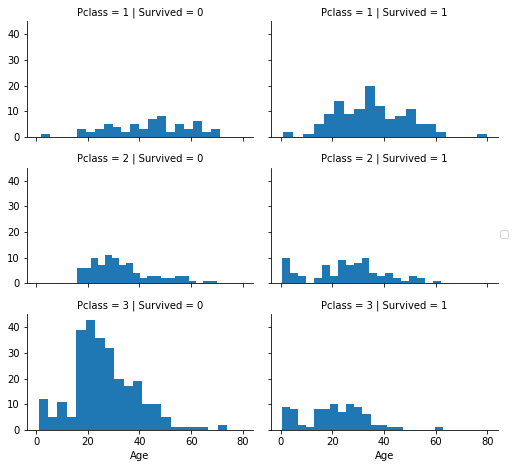

In [21]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Pclass', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', bins = 20)
grid.add_legend()

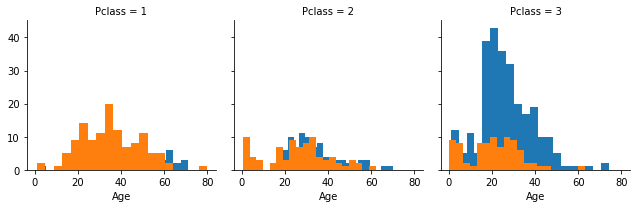

In [22]:
grid = sns.FacetGrid(train_df, col='Pclass', hue='Survived')   ## oR
grid.map(plt.hist, 'Age', bins = 20)

In [23]:
## categorical

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:708: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)


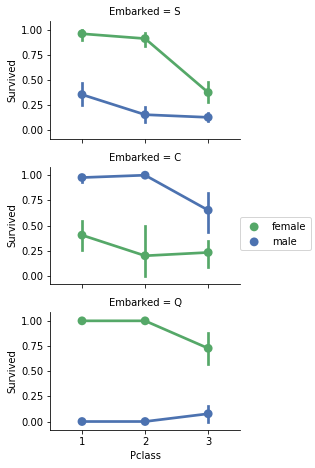

In [24]:
grid = sns.FacetGrid(train_df, row = 'Embarked',size = 2.2, aspect = 1.6)
grid.map(sns.pointplot, 'Pclass', 'Survived', 'Sex', palette = 'deep')
grid.add_legend()

In [25]:
#correlation

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


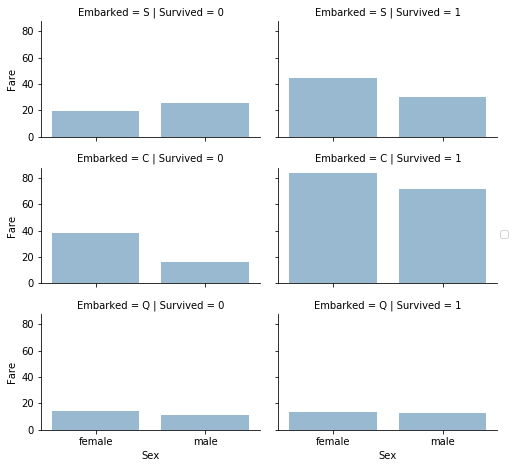

In [26]:
grid = sns.FacetGrid(train_df, col = 'Survived', row = 'Embarked', size = 2.2, aspect = 1.6)
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)
grid.add_legend()

C:\Users\khema\Anaconda3\lib\site-packages\seaborn\axisgrid.py:703: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


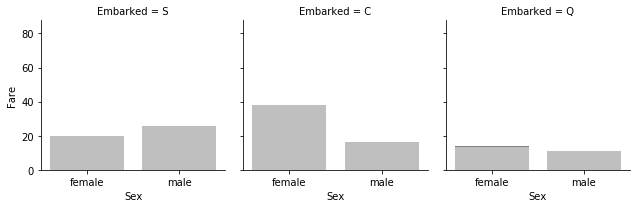

In [27]:
grid = sns.FacetGrid(train_df, col='Embarked', hue='Survived', palette={0: 'k', 1: 'w'})  # Wrong !!!
grid.map(sns.barplot, 'Sex', 'Fare', alpha = 0.5, ci = None)

In [28]:
#data wrangling

In [29]:
print('Before', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)#combine[0] is train set,combine[1] is test set

train_df = train_df.drop(['Ticket', 'Cabin'], axis = 1)           #combine is a list
test_df = test_df.drop(['Ticket', 'Cabin'], axis = 1)

print('After', train_df.shape, test_df.shape, combine[0].shape, combine[1].shape)

Before (891, 12) (418, 11) (891, 12) (418, 11)
After (891, 10) (418, 9) (891, 12) (418, 11)


In [30]:
# creating new feature

In [31]:
# The RegEx pattern (\w+\.) matches the first word which ends with a dot character within Name feature. 
# The expand=False flag returns a DataFrame.

In [32]:
for dataset in combine: #combine is a list, iterable
    dataset['Title'] = dataset.Name.str.extract(' ([A-Za-z]+)\.', expand = False)
    
#pd.crosstab(train_df['Title'], train_df['Sex'])  #traind_df doesnot have 'Title' column, iteration has taken place in -- combine
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Capt,0,1
Col,0,2
Countess,1,0
Don,0,1
Dr,1,6
Jonkheer,0,1
Lady,1,0
Major,0,2
Master,0,40


In [33]:
#dataset.head()  #it has gone to test

In [34]:
#pd.crosstab(dataset['Title'], dataset['Sex'])

In [35]:
for dataset in combine:
    dataset['Title'] = dataset['Title'].replace(['Lady', 'Countess', 'Capt', 'Col','Don', 
                                                 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], 'Rare')
    dataset['Title'] = dataset['Title'].replace('Mlle', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Ms', 'Miss')
    dataset['Title'] = dataset['Title'].replace('Mme', 'Mrs')

In [36]:
pd.crosstab(combine[0]['Title'], combine[0]['Sex'])

Sex,female,male
Title,,
Master,0,40
Miss,185,0
Mr,0,517
Mrs,126,0
Rare,3,20


In [37]:
combine[0][['Title', 'Survived']].groupby(['Title'], as_index = False).mean()  #combine[0] is train

,Title,Survived
0,Master,0.575000
1,Miss,0.702703
2,Mr,0.156673
3,Mrs,0.793651
4,Rare,0.347826


In [38]:
title_mapping = {'Mr' :1, 'Miss': 2, 'Mrs': 3, 'Master': 4, 'Rare': 5}

for dataset in combine:
    dataset['Title'] = dataset['Title'].map(title_mapping)
    dataset['Title'] = dataset['Title'].fillna(0)
    
combine[0].head()    #train set  #by mistake combine still has cabin and ticket, remove them
#train_df.head() #nochanges

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,2
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,3
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,1


In [39]:
train_df= combine[0].copy()  #combine stil has cabin and ticket, remove them
test_df= combine[1].copy()

In [40]:
train_df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,3


In [41]:
test_df.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q,1
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S,3


In [42]:
train_df = train_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)
test_df = test_df.drop(['PassengerId', 'Name', 'Cabin', 'Ticket'], axis = 1)

In [43]:
train_df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,male,22.0,1,0,7.2500,S,1
1,1,1,female,38.0,1,0,71.2833,C,3


In [44]:
combine = [train_df, test_df]
train_df.shape, test_df.shape

((891, 9), (418, 8))

In [45]:
for dataset in combine:
    dataset['Sex'] = dataset['Sex'].map({'female': 1, 'male': 0}).astype(int)
    
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22.0,1,0,7.2500,S,1
1,1,1,1,38.0,1,0,71.2833,C,3
2,1,3,1,26.0,0,0,7.9250,S,2
3,1,1,1,35.0,1,0,53.1000,S,3
4,0,3,0,35.0,0,0,8.0500,S,1


In [46]:
#Now we should start estimating and completing features with missing or null values. We will first do this for the Age feature.

#We can consider three methods to complete a numerical continuous feature.

#A simple way is to generate random numbers between mean and standard deviation.

#More accurate way of guessing missing values is to use other correlated features. In our case we note correlation among Age, 
#Gender, and Pclass. Guess Age values using median values for Age across sets of Pclass and Gender feature combinations. 
#So, median Age for Pclass=1 and Gender=0, Pclass=1 and Gender=1, and so on...

#Combine methods 1 and 2. So instead of guessing age values based on median, use random numbers between mean and standard 
#deviation, based on sets of Pclass and Gender combinations.

#Method 1 and 3 will introduce random noise into our models. The results from multiple executions might vary. We will prefer 
#method 2.

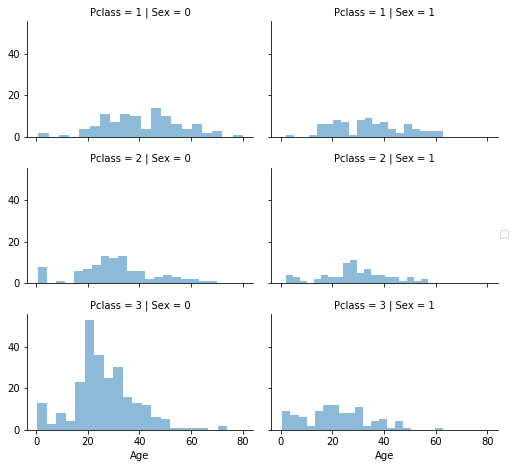

In [47]:
grid = sns.FacetGrid(train_df, row = 'Pclass', col ='Sex', size = 2.2, aspect = 1.6)
grid.map(plt.hist, 'Age', alpha = 0.5, bins = 20)
grid.add_legend()

In [48]:
#Let us start by preparing an empty array to contain guessed Age values based on Pclass x Gender combinations

In [49]:
guess_ages = np.zeros((2,3))
guess_ages

array([[ 0.,  0.,  0.],
       [ 0.,  0.,  0.]])

In [50]:
#Now we iterate over Sex (0 or 1) and Pclass (1, 2, 3) to calculate guessed values of Age for the six combinations

In [51]:
for dataset in combine:
    for i in range(0,2):
        for j in range(0,3):
            guess_df = dataset[(dataset['Sex'] == i) & (dataset['Pclass'] == j+1)]['Age'].dropna()

            # age_mean = guess_df.mean()  ## dist fill
            # age_std = guess_df.std()
            # age_guess = rnd.uniform(age_mean - age_std, age_mean + age_std)
            
            age_guess = guess_df.median()
            guess_ages[i,j] =int(age_guess/0.5 + 0.5)*0.5
            
    for i in range(0, 2):
        for j in range(0, 3):
            dataset.loc[(dataset.Age.isnull()) & (dataset.Sex == i) & (dataset.Pclass == j+1), 'Age'] = guess_ages[i,j]
    dataset['Age'] =  dataset['Age'].astype(int)

In [52]:
guess_df.head()

1     47.0
4     22.0
6     30.0
8     18.0
18    27.0
Name: Age, dtype: float64

In [53]:
age_guess

22.0

In [54]:
guess_ages

array([[ 42.,  28.,  24.],
       [ 41.,  24.,  22.]])

In [55]:
dataset.Age.isnull().any()

False

In [56]:
dataset.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,3,0,34,0,0,7.8292,Q,1
1,3,1,47,1,0,7.0000,S,3
2,2,0,62,0,0,9.6875,Q,1
3,3,0,27,0,0,8.6625,S,1
4,3,1,22,1,1,12.2875,S,3


In [57]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,22,1,0,7.2500,S,1
1,1,1,1,38,1,0,71.2833,C,3
2,1,3,1,26,0,0,7.9250,S,2
3,1,1,1,35,1,0,53.1000,S,3
4,0,3,0,35,0,0,8.0500,S,1


In [58]:
#Let us create Age bands and determine correlations with Survived.

In [59]:
train_df['AgeBand'] = pd.cut(train_df['Age'], 5)

In [60]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,22,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,38,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,26,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,35,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,35,0,0,8.0500,S,1,"(32.0, 48.0]"


In [61]:
train_df[['AgeBand', 'Survived']].groupby(['AgeBand'], as_index=False).mean().sort_values(by='AgeBand', ascending=True)

,AgeBand,Survived
0,"(-0.08, 16.0]",0.550000
1,"(16.0, 32.0]",0.337374
2,"(32.0, 48.0]",0.412037
3,"(48.0, 64.0]",0.434783
4,"(64.0, 80.0]",0.090909


In [62]:
# Let us replace Age with ordinals based on these bands

In [63]:
for dataset in combine:
    dataset.loc[dataset.Age <= 16, 'Age' ] = 0
    dataset.loc[(dataset.Age > 16) & (dataset.Age <= 32), 'Age' ] = 1
    dataset.loc[(dataset.Age > 32) & (dataset.Age <= 48), 'Age' ] = 2
    dataset.loc[(dataset.Age > 48) & (dataset.Age <= 64), 'Age' ] = 3
    dataset.loc[(dataset.Age > 64) & (dataset.Age <= 80), 'Age' ] = 4

train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title,AgeBand
0,0,3,0,1,1,0,7.2500,S,1,"(16.0, 32.0]"
1,1,1,1,2,1,0,71.2833,C,3,"(32.0, 48.0]"
2,1,3,1,1,0,0,7.9250,S,2,"(16.0, 32.0]"
3,1,1,1,2,1,0,53.1000,S,3,"(32.0, 48.0]"
4,0,3,0,2,0,0,8.0500,S,1,"(32.0, 48.0]"


In [64]:
train_df.Age.isnull().any()

False

In [65]:
train_df = train_df.drop(['AgeBand'], axis =1)
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [66]:
train_df1 = train_df.copy()

In [67]:
train_df1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Title
0,0,3,0,1,1,0,7.2500,S,1
1,1,1,1,2,1,0,71.2833,C,3
2,1,3,1,1,0,0,7.9250,S,2
3,1,1,1,2,1,0,53.1000,S,3
4,0,3,0,2,0,0,8.0500,S,1


In [68]:
combine1 = [train_df1, test_df]

In [69]:
# Create new feature combining existing features
# We can create a new feature for FamilySize which combines Parch and SibSp. This will enable us to drop Parch and SibSp 
# from our datasets.

In [70]:
for dataset in combine1:
    dataset['FamilySize'] = dataset['SibSp'] + dataset['Parch'] + 1

train_df1.head()
train_df1[['FamilySize', 'Survived']].groupby(['FamilySize'], as_index=False).mean().sort_values(by='FamilySize', ascending=False)

,FamilySize,Survived
8,11,0.000000
7,8,0.000000
6,7,0.333333
5,6,0.136364
4,5,0.200000
3,4,0.724138
2,3,0.578431
1,2,0.552795
0,1,0.303538


In [71]:
#We can create another feature called IsAlone

In [72]:
for dataset in combine1:
    dataset['IsAlone'] = 0
    dataset.loc[dataset['FamilySize'] == 1, 'IsAlone'] = 1

train_df1[['IsAlone', 'Survived']].groupby(['IsAlone'], as_index= False).mean()

,IsAlone,Survived
0,0,0.505650
1,1,0.303538


In [73]:
#Let us drop Parch, SibSp, and FamilySize features in favor of IsAlone.

In [74]:
train_df2 = train_df1.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
test_df2 = test_df.drop(['Parch', 'SibSp', 'FamilySize'], axis=1)
combine2 = [train_df2, test_df2]

train_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone
0,0,3,0,1,7.2500,S,1,0
1,1,1,1,2,71.2833,C,3,0
2,1,3,1,1,7.9250,S,2,1
3,1,1,1,2,53.1000,S,3,0
4,0,3,0,2,8.0500,S,1,1


In [75]:
#We can also create an artificial feature combining Pclass and Age.

In [76]:
for dataset in combine2:
    dataset['Age*Class'] = dataset.Age*dataset.Pclass

train_df2.loc[:, ['Age*Class', 'Age', 'Pclass']].head()

,Age*Class,Age,Pclass
0,3,1,3
1,2,2,1
2,3,1,3
3,2,2,1
4,6,2,3


In [77]:
# Completing a categorical feature #Embarked
#Embarked feature takes S, Q, C values based on port of embarkation. Our training dataset has two missing values. 
#We simply fill these with the most common occurance.

In [78]:
freq_port = train_df.Embarked.dropna().mode()[0]
freq_port

'S'

In [79]:
for dataset in combine2:
    dataset['Embarked'] = dataset['Embarked'].fillna(freq_port)  #fillna('S')
    
train_df2[['Embarked', 'Survived']].groupby(['Embarked'], as_index= False).mean().sort_values(by='Embarked', ascending=True)

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.339009


In [80]:
#Converting categorical feature to numeric¶
#We can now convert the EmbarkedFill feature by creating a new numeric Port feature

In [81]:
for dataset in combine2:
    dataset['Embarked'] = dataset['Embarked'].map({'S': 0, 'C': 1, 'Q': 2}).astype(int)
    
train_df2.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,7.2500,0,1,0,3
1,1,1,1,2,71.2833,1,3,0,2
2,1,3,1,1,7.9250,0,2,1,3
3,1,1,1,2,53.1000,0,3,0,2
4,0,3,0,2,8.0500,0,1,1,6


In [82]:
#Quick completing and converting a numeric feature
#We can now complete the Fare feature for single missing value in test dataset using mode to get the value that occurs 
#most frequently for this feature. We do this in a single line of code.

#Note that we are not creating an intermediate new feature or doing any further analysis for correlation to
#guess missing feature as we are replacing only a single value. The completion goal achieves desired requirement for
#model algorithm to operate on non-null values.

#We may also want round off the fare to two decimals as it represents currency.

In [83]:
test_df2['Fare'].fillna(test_df2['Fare'].dropna().median(), inplace=True)
test_df2.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,7.8292,2,1,1,6
1,3,1,2,7.0000,0,3,0,6
2,2,0,3,9.6875,2,1,1,6
3,3,0,1,8.6625,0,1,1,3
4,3,1,1,12.2875,0,3,0,3


In [84]:
##We can not create FareBand.

In [85]:
train_df2['FareBand'] = pd.qcut(train_df2['Fare'],4)
train_df2[['FareBand', 'Survived']].groupby(['FareBand'], as_index = False).mean().sort_values(by = 'FareBand', ascending=True)

,FareBand,Survived
0,"(-0.001, 7.91]",0.197309
1,"(7.91, 14.454]",0.303571
2,"(14.454, 31.0]",0.454955
3,"(31.0, 512.329]",0.581081


In [86]:
for dataset in combine2:
    dataset.loc[dataset['Fare'] <= 7.91, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 7.91) & (dataset['Fare'] <= 14.454), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 14.454) & (dataset['Fare'] <= 31), 'Fare'] = 2
    dataset.loc[dataset['Fare'] > 31, 'Fare'] = 3
    dataset['Fare'] = dataset['Fare'].astype(int)

In [87]:
train_df3 = train_df2.drop(['FareBand'], axis = 1)
train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [88]:
test_df3 = test_df2.copy()

In [89]:
combine3 = [train_df3, test_df]
train_df3.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,0,3,0,1,0,0,1,0,3
1,1,1,1,2,3,1,3,0,2
2,1,3,1,1,1,0,2,1,3
3,1,1,1,2,3,0,3,0,2
4,0,3,0,2,1,0,1,1,6


In [90]:
test_df3.head()

,Pclass,Sex,Age,Fare,Embarked,Title,IsAlone,Age*Class
0,3,0,2,0,2,1,1,6
1,3,1,2,0,0,3,0,6
2,2,0,3,1,2,1,1,6
3,3,0,1,1,0,1,1,3
4,3,1,1,1,0,3,0,3


Model, predict and solve
Now we are ready to train a model and predict the required solution. There are 60+ predictive modelling algorithms to choose from. We must understand the type of problem and solution requirement to narrow down to a select few models which we can evaluate. Our problem is a classification and regression problem. We want to identify relationship between output (Survived or not) with other variables or features (Gender, Age, Port...). We are also perfoming a category of machine learning which is called supervised learning as we are training our model with a given dataset. With these two criteria - Supervised Learning plus Classification and Regression, we can narrow down our choice of models to a few. These include:

Logistic Regression
KNN or k-Nearest Neighbors
Support Vector Machines
Naive Bayes classifier
Decision Tree
Random Forrest
Perceptron
Artificial neural network
RVM or Relevance Vector Machine

In [91]:
X_train = train_df3.drop("Survived", axis=1)
Y_train = train_df3["Survived"]
X_test  = test_df3.copy()
X_train.shape, Y_train.shape, X_test.shape

((891, 8), (891,), (418, 8))

Logistic Regression is a useful model to run early in the workflow. Logistic regression measures the relationship between the categorical dependent variable (feature) and one or more independent variables (features) by estimating probabilities using a logistic function, which is the cumulative logistic distribution. Reference Wikipedia.

Note the confidence score generated by the model based on our training dataset.

This model uses a decision tree as a predictive model which maps features (tree branches) to conclusions about the target value (tree leaves). Tree models where the target variable can take a finite set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees. Reference Wikipedia.

The model confidence score is the highest among models evaluated so far.

In [92]:
# Decision Tree

decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, Y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [93]:
acc_DT = decision_tree.score(X_train, Y_train)
acc_DT

0.86644219977553316

In [94]:
Y_pred4 = decision_tree.predict(X_test)

In [95]:
Y_pred4

array([0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0,

In [96]:
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.grid_search import GridSearchCV
from time import time

from operator import itemgetter

C:\Users\khema\Anaconda3\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
C:\Users\khema\Anaconda3\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [97]:
# create a function to perform grid search with cross validation and returns the accuracy values
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,param_grid=param_grid,cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params

param_grid = {"criterion": ["gini","entropy"],
              "splitter" : ["best","random"],
             "min_samples_split": [2,3,5,7,10,15,18,20,25,30],
             "max_depth": [3,5,7,10,15],
             "min_samples_leaf":[3,5,10,15,20,7,12],
             "max_features" : ["auto","log2"]}


In [98]:
cvDT = DecisionTreeClassifier()
cvDT


DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [99]:

top_para = GridSearch_BestParam(X_train,Y_train, cvDT, param_grid, cv=10)
print (top_para)


[mean: 0.76319, std: 0.04244, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'}, mean: 0.74747, std: 0.07376, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'random'}, mean: 0.75982, std: 0.04205, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'best'}, mean: 0.75084, std: 0.06016, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 3, 'splitter': 'random'}, mean: 0.77553, std: 0.03795, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'best'}, mean: 0.76655, std: 0.04961, params: {'criterion': 'gini', 'max_depth': 3, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'r

In [100]:
top_score = sorted(top_para,key=itemgetter(1), reverse=True)
top_score


[mean: 0.82155, std: 0.03764, params: {'criterion': 'gini', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 5, 'splitter': 'random'},
 mean: 0.82043, std: 0.03841, params: {'criterion': 'entropy', 'max_depth': 5, 'max_features': 'auto', 'min_samples_leaf': 3, 'min_samples_split': 7, 'splitter': 'best'},
 mean: 0.81930, std: 0.02795, params: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'log2', 'min_samples_leaf': 5, 'min_samples_split': 7, 'splitter': 'random'},
 mean: 0.81930, std: 0.04119, params: {'criterion': 'entropy', 'max_depth': 7, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 2, 'splitter': 'best'},
 mean: 0.81930, std: 0.04546, params: {'criterion': 'entropy', 'max_depth': 10, 'max_features': 'log2', 'min_samples_leaf': 3, 'min_samples_split': 10, 'splitter': 'random'},
 mean: 0.81818, std: 0.03778, params: {'criterion': 'gini', 'max_depth': 10, 'max_features': 'auto', 'min_samples_leaf': 7, 'min_samples_split'

In [101]:
paramCV = top_score[0].parameters
paramCV

{'criterion': 'gini',
 'max_depth': 7,
 'max_features': 'log2',
 'min_samples_leaf': 3,
 'min_samples_split': 5,
 'splitter': 'random'}

In [102]:
cvDT2 = DecisionTreeClassifier(criterion='gini',
 max_depth=7,
 max_features='log2',
 min_samples_leaf= 3,
 min_samples_split= 5,
 splitter='random')
cvDT2

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=7,
            max_features='log2', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=3, min_samples_split=5,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='random')